**Importing the required Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

**Loading the dataset**

In [ ]:
iris_data = pd.read_csv("/content/IRIS.csv")

**Reading the dataset**

In [ ]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Data Preprocessing**

In [ ]:
iris_data.columns #displaying the column names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_data.shape #finding the shape of the data

(150, 5)

In [ ]:
iris_data.head() #fetching the first five records

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.tail() #fetching the last five records

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris_data.describe(include='all') #describing the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
iris_data.info() #checking for info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_data.dtypes #checking the type of data

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
iris_data.isnull().sum() #checking for null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris_data.duplicated() #checking for duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
iris_data['species'].value_counts() #counting the values

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Visualizations**

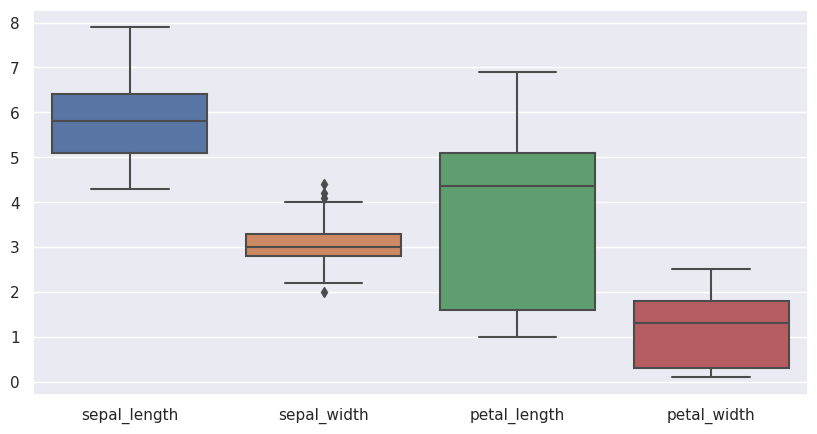

In [ ]:
#plotting the boxplot
plt.figure(figsize=(10,5))
sns.boxplot(iris_data)
plt.show()

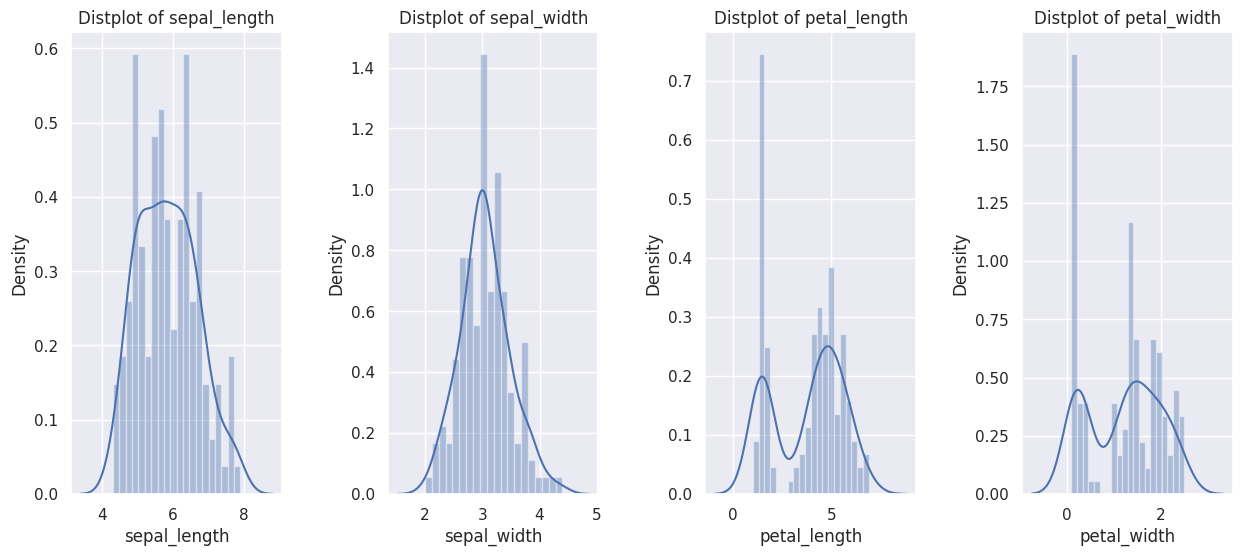

In [ ]:
#distplot for sepal_lenvgth, sepal_width, petal_length, petal_width
plt.figure(1 , figsize = (15, 6))
n = 0
for x in ['sepal_length' , 'sepal_width' , 'petal_length', 'petal_width']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(iris_data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

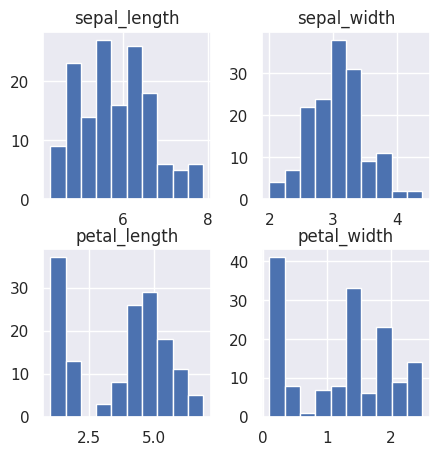

In [ ]:
#plotting the histogram
iris_data.hist(figsize=(5,5))
plt.show()

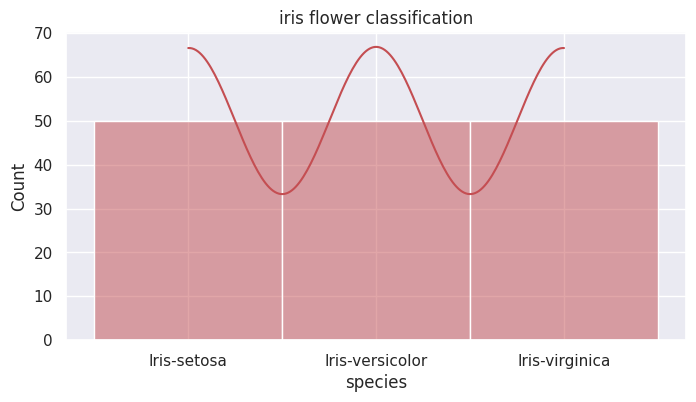

In [ ]:
#histplot
plt.figure(figsize=[8,4])
sns.histplot(iris_data.species, color='r', bins=30, kde=True)
plt.title('iris flower classification')
plt.show()

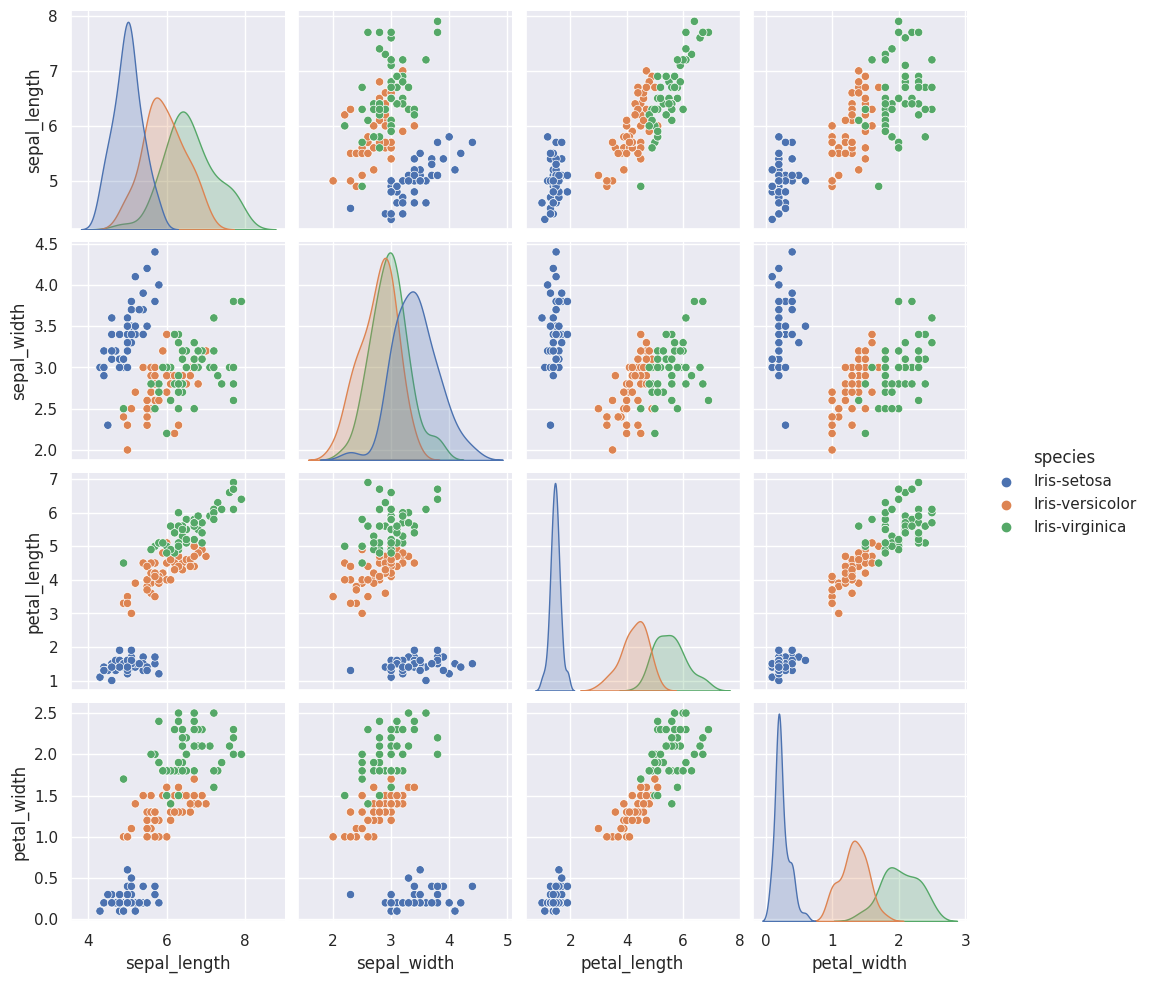

In [ ]:
#pairplot on iris dataset
sns.pairplot(data=iris_data, hue='species')
plt.show()

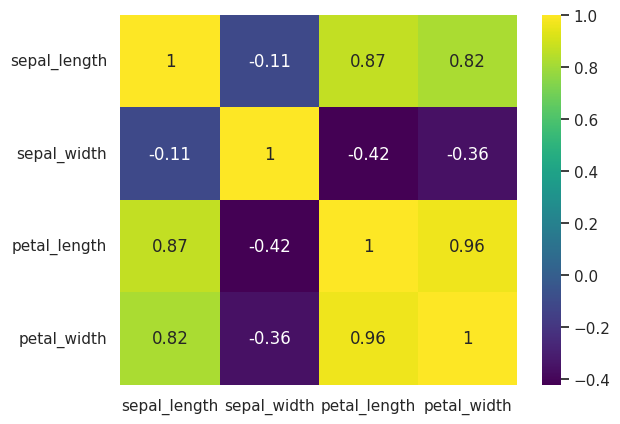

In [ ]:
#heatmap to find the correlation
sns.heatmap(iris_data.corr(), cmap="viridis", annot = True)
plt.show()

**Performing the Train-Test split**

In [ ]:
#dropping the species column in x
x = iris_data.drop("species", axis=1)
y= iris_data[["species"]]

In [ ]:
x.head() #fetching the five records

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head() #fetching the last five records

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
#performing the train test split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape #finding the shape of the x_train

(120, 4)

In [ ]:
y_train.shape #finding the shape of the y_train

(120, 1)

In [ ]:
x_train.dtypes #checking for datatypes of x_train

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
y_train.dtypes #checking for datatypes of y_train

species    object
dtype: object

In [ ]:
x_train.head() #fetching the first five records

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [ ]:
y_train.head() #fetching the last five records

,species
137,Iris-virginica
84,Iris-versicolor
27,Iris-setosa
127,Iris-virginica
132,Iris-virginica


**Model Building**

**Logistic Regression**

In [ ]:
#model building using logistic regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#predicting the model
y_pred = lr_model.predict(x_test)

In [ ]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
#finding the accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 100.0


In [ ]:
#printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
#printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


**KNeighbor Classifier**

In [ ]:
# Create and train the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can experiment with different values of k
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test set
y_pred = knn_classifier.predict(x_test)

In [ ]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 96.66666666666667


In [ ]:
#Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
